In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.63


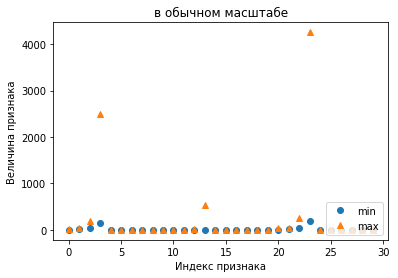

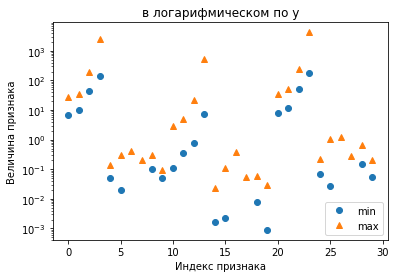

In [16]:
import matplotlib.pyplot as plt

#plt.subplots(2, 1, figsize=(10, 10))

#plt.subplot(2,1,1)
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
#plt.yscale("log")
plt.title("в обычном масштабе")
plt.show()

#plt.subplot(2,1,2)
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")
plt.title("в логарифмическом по y")
plt.show()

In [17]:
# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора
range_on_training = (X_train - min_on_training).max(axis=0)
# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Максимальное значение для каждого признака
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [18]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора (см. главу 3)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [19]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.948
Правильность на тестовом наборе: 0.951


In [20]:
#можем попытаться увеличить С или gamma, чтобы подогнать более сложную модель
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972
